In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from subprocess import call
from PIL import Image

plt.rcParams['figure.figsize'] = (10, 6)

### Levanto la imagen original redimensionada

In [2]:
original = np.genfromtxt("img_original.csv", delimiter=',').ravel()
original.shape

(625,)

### Corro el main para los distintos numeros de rayos

In [69]:
outputdir = "img_convertidas/"
inputdir = "../../csvs/tomo.csv"

n_rayos = [x for x in range(1000, 5001, 500)] + [x for x in range(6000, 10001, 1000)]
for rayos in n_rayos:
    print(rayos)
    outputdir2 = outputdir + "tomo_{}_rayos.csv".format(rayos)
    call(["../../src/main", '-i', inputdir, '-o', outputdir2, '-v', '1', '-d', '4', '-rayos', str(rayos), '-pixel', '1'])

1000
1500
2000
2500
3000
3500
4000
4500
5000
6000
7000
8000
9000
10000


### Calculo MSE para cada reconstruccion

In [74]:
path_imgs = [outputdir + "tomo_{}_rayos.csv".format(rayo) for rayo in n_rayos]

mserrors = []

for path in path_imgs:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        mse = mean_squared_error(original, reconstructed)
        mserrors.append(mse)

### Grafico resultados

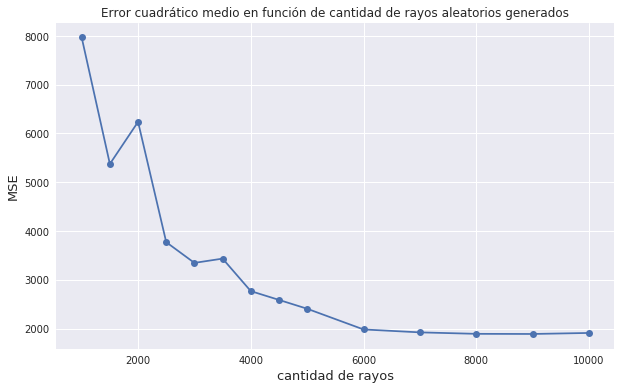

In [76]:
plt.plot(n_rayos, mserrors, marker='o')
plt.xlabel("cantidad de rayos", fontsize=13)
plt.ylabel("MSE", fontsize=13)
plt.title("ECM en función de cantidad de rayos aleatorios generados (Imagenes de 25x25)")
plt.show()